In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

import sklearn.metrics as metrics
import warnings


from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings(action='ignore')

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
Child_Abuser = pd.read_csv("./Child_Abuser_dum_final_2.csv",encoding = 'CP949')
Child_Abuser

,아동_위험점수,조대_재신고여부_1,조대_동일신고여부,조대_아동동거여부,판단_유형_신체,판단_유형_정서,판단_유형_성,판단_유형_방임,신고_접수연도,아특_난독해,...,행위_다문화가족_일반,행위_가구소득구분코_100만원이상-150만원미만,행위_가구소득구분코_150만원이상-200만원미만,행위_가구소득구분코_200만원이상-250만원미만,행위_가구소득구분코_250만원이상-300만원미만,행위_가구소득구분코_300만원이상,행위_가구소득구분코_50만원미만,행위_가구소득구분코_50만원이상~100만원미만,행위_기초생활수급유_비수급권대상,행위_기초생활수급유_수급권대상
0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2015.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33375,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2018.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33376,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2018.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33377,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2018.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33378,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2018.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
for i in range(len(Child_Abuser.columns)):
    print(i, Child_Abuser.columns[i])

0 아동_위험점수
1 조대_재신고여부_1
2 조대_동일신고여부
3 조대_아동동거여부
4 판단_유형_신체
5 판단_유형_정서
6 판단_유형_성
7 판단_유형_방임
8 신고_접수연도
9 아특_난독해
10 아특_약물
11 아특_잦은결석
12 아특_양육지식부족
13 아특_늦은귀가
14 아특_잦은병치례
15 아특_성문제
16 아특_장애의심
17 아특_기타
18 아특_주의산만
19 아특_신체발달지연
20 아특_나태_무기력
21 아특_종교문제
22 아특_도벽
23 아특_무단결과
24 아특_호흡기장애
25 아특_사회적고립
26 아특_장루요루장애
27 아특_반항
28 아특_언어문제
29 아특_과잉행동
30 아특_폭력행동
31 아특_불건전또래관계
32 아특_지적장애
33 아특_가출
34 아특_전과력
35 아특_우울
36 아특_뇌병변장애
37 아특_인터넷게임중독
38 아특_배우자폭력
39 아특_청각장애
40 아특_안면장애
41 아특_정신질환및장애
42 아특_정서문제
43 아특_영양결핍
44 아특_대인관계기피
45 아특_흡연
46 아특_신체질환및장애
47 아특_원치않는아동
48 아특_간장애
49 아특_존속학대
50 아특_지체장애
51 아특_언어장애
52 아특_어릴적학대경험
53 아특_오락중독
54 아특_부부및가족갈등
55 아특_낮은자아존중감
56 아특_부적절양육태도
57 아특_정신장애
58 아특_탐식및결식
59 아특_비행집단활동
60 아특_충동
61 아특_틱장애
62 아특_학습문제
63 아특_성격및기질문제
64 아특_위생문제
65 아특_자폐성장애
66 아특_대소변문제
67 아특_애착문제
68 아특_허약
69 아특_경제적어려움
70 아특_급만성질병
71 아특_불안
72 아특_뇌전증장애
73 아특_신장장애
74 아특_학교부적응
75 아특_기타장애
76 아특_공격성
77 아특_알콜남용
78 아특_무력감
79 아특_스트레스
80 아특_거짓말
81 아특_시각장애
82 아특_특성없음
83 아특_난작문
84 아특_심장장애
85 아특_도박중독
86 아특_사회성문제
87 아특_음주
88 아조_기타

In [ ]:
Child_Abuser.rename(columns = {'행위_병력_상세병명확인되지않았으나':'행위_병력_상세병명확인안됨',
                     '행위_병력_병원입원중임.':'행위_병력_병원입원중'}
                    , inplace = True)

In [ ]:
Child_Abuser.columns = Child_Abuser.columns.str.replace('ㆍ','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('·','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('(','')
Child_Abuser.columns = Child_Abuser.columns.str.replace(')','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('+','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('~','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('-','')
Child_Abuser.columns = Child_Abuser.columns.str.replace(',','')
Child_Abuser.columns = Child_Abuser.columns.str.replace("'",'')

# 1. 재학대혐의여부&변수선택 모델

In [ ]:
col115 = ['조대_재신고여부_1',
'조대_동일신고여부',
'아특_양육지식부족',
'아특_반항',
'아특_뇌병변장애',
'아특_정서문제',
'아특_지체장애',
'아특_부적절양육태도',
'아특_경제적어려움',
'아특_알콜남용',
'아특_거짓말',
'아특_사회성문제',
'행특_잦은병치례',
'행특_허약',
'행특_비행집단활동',
'행특_신체발달지연',
'행특_주의산만',
'행특_폭력행동',
'행특_뇌병변장애',
'행특_난독해',
'행특_사회성문제',
'행특_탐식및결식',
'행특_난작문',
'행특_기타장애',
'행특_낮은자아존중감',
'행특_존속학대',
'행특_원치않는아동',
'행특_도박중독',
'행특_급만성질병',
'행특_약물남용',
'아동_병력_마르팡증후군',
'아동_병력_지적장애',
'아동_병력_대퇴골두무혈성괴사',
'아동_병력_로이디에츠증후군',
'아동_병력_콩팥거대증',
'아동_병력_조현병',
'아동_병력_희귀난치성질환',
'아동_병력_성홍열',
'아동_병력_뇌압상승질병',
'아동_병력_충동장애',
'행위_병력_알츠하이머',
'행위_병력_당뇨합병증',
'행위_병력_방광암',
'행위_병력_합병증',
'행위_병력_우을증',
'행위_병력_대장암',
'행위_병력_분노조절장애',
'행위_병력_공황장애',
'행위_병력_골수염',
'행위_병력_강박증',
'행위_병력_전신골절및뇌출혈',
'행위_병력_조현병',
'행위_병력_근막염',
'행위_병력_유방암',
'행위_병력_안질환',
'행위_병력_갑상선암',
'행위_병력_뇌출혈',
'행위_병력_편집성인격장애',
'행위_병력_간경변',
'행위_병력_다운증후군',
'행위_병력_자궁경부암2기',
'아동_위험유형_08',
'행위_위험유형_02',
'아동_내국인여부_내국인',
'아동_최종학력_무학',
'아동_최종학력_재학중',
'아동_최종학력_중등중퇴',
'아동_최종학력_초등중퇴',
'아동_직업유형_무직',
'아동_직업유형_사무종사자',
'아동_친권자유형_양부모',
'아동_친권자유형_친권자 없음',
'아동_가족유형_모자가족가출',
'아동_가족유형_위탁가정',
'아동_다문화가족_북한이탈주민',
'아동_가구소득구분코_150만원이상200만원미만',
'아동_가구소득구분코_250만원이상300만원미만',
'아동_가구소득구분코_50만원미만',
'아동_보호조치유형_1.0',
'신고_접수경로구분코_기타',
'신고_접수경로구분코_상담원 인지신고',
'신고_접수경로구분코_아동행복지원  상담원인지신고',
'신고_접수경로구분코_타기관통보',
'신고_접수유형_아동학대 의심사례',
'신고_피해아동상태구_아동사망',
'신대_행위자아동관계_기타시설종사자',
'신대_행위자아동관계_베이비시터아이돌보미',
'신대_행위자아동관계_부모의 동거인',
'신대_행위자아동관계_어린이집보육교직원 종사자',
'신대_행위자아동관계_위탁모',
'신대_행위자아동관계_유치원교사교직원 종사자',
'신대_행위자아동관계_이웃',
'신대_행위자아동관계_친부',
'신대_행위자아동관계_친인척',
'신대_행위자아동관계_학교교원 교직원',
'신대_행위자아동관계_학원강사 종사자',
'신대_통계거점_경남',
'신대_통계거점_중앙',
'조사_집단시설내사건_어린이집',
'조대_재신고유형구분_동일센터 사례종결후 재신고',
'조대_재신고유형구분_사례진행중 재신고',
'조대_재신고유형구분_일반상담 후 재신고',
'조대_재신고유형구분_타센터 사례종결후 재신고',
'행위_연령대_19세이하',
'행위_최종학력_무학',
'행위_직업유형_비정규직',
'행위_직업유형_주부',
'행위_친권자유형_양부모',
'행위_가족유형_기타',
'행위_가족유형_모자가족사별',
'행위_가족유형_모자가족이혼',
'행위_가족유형_미혼부모가정',
'행위_가족유형_부자가족사별',
'행위_다문화가족_북한이탈주민',
'행위_가구소득구분코_50만원미만']

In [ ]:
X = Child_Abuser[col115]
X

,조대_재신고여부_1,조대_동일신고여부,아특_양육지식부족,아특_반항,아특_뇌병변장애,아특_정서문제,아특_지체장애,아특_부적절양육태도,아특_경제적어려움,아특_알콜남용,...,행위_직업유형_비정규직,행위_직업유형_주부,행위_친권자유형_양부모,행위_가족유형_기타,행위_가족유형_모자가족사별,행위_가족유형_모자가족이혼,행위_가족유형_미혼부모가정,행위_가족유형_부자가족사별,행위_다문화가족_북한이탈주민,행위_가구소득구분코_50만원미만
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33378,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X['신고_접수연도'] = Child_Abuser['신고_접수연도']

In [ ]:
# X_train 지정
X_train = X[(X['신고_접수연도'] == 2014) | (X['신고_접수연도'] == 2015) | (X['신고_접수연도'] == 2016) | (X['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)

# X_test 지정
X_test = X[X['신고_접수연도'] == 2018]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,조대_재신고여부_1,조대_동일신고여부,아특_양육지식부족,아특_반항,아특_뇌병변장애,아특_정서문제,아특_지체장애,아특_부적절양육태도,아특_경제적어려움,아특_알콜남용,...,행위_직업유형_비정규직,행위_직업유형_주부,행위_친권자유형_양부모,행위_가족유형_기타,행위_가족유형_모자가족사별,행위_가족유형_모자가족이혼,행위_가족유형_미혼부모가정,행위_가족유형_부자가족사별,행위_다문화가족_북한이탈주민,행위_가구소득구분코_50만원미만
15451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33378,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = Child_Abuser[['New_재학대혐의여부','신고_접수연도']]
y

,New_재학대혐의여부,신고_접수연도
0,0.0,2015.0
1,0.0,2016.0
2,0.0,2016.0
3,0.0,2016.0
4,0.0,2016.0
...,...,...
33375,0.0,2018.0
33376,0.0,2018.0
33377,0.0,2018.0
33378,1.0,2018.0


In [ ]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15451, 115)
(17929, 115)
(15451, 1)
(17929, 1)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

임계점 default(0.5)일 때 정확도 :  0.8622343688995482 

임계점 0.1 일때 정확도는 0.77입니다.
임계점 0.2 일때 정확도는 0.82입니다.
임계점 0.3 일때 정확도는 0.85입니다.
임계점 0.4 일때 정확도는 0.87입니다.
임계점 0.5 일때 정확도는 0.86입니다.
임계점 0.6 일때 정확도는 0.85입니다.
임계점 0.7 일때 정확도는 0.84입니다.
임계점 0.8 일때 정확도는 0.83입니다.
임계점 0.9 일때 정확도는 0.81입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [ ]:
print(Logit.score(X_train, y_train))

0.8849912627014432


In [ ]:
print(Logit.score(X_test, y_test))

0.8622343688995482


In [ ]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.88499
테스트 세트 정확도 : 0.86223


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, y_pred)

오차행렬:
 [[13549    85]
 [ 3290  1005]]

정확도: 0.8118
정밀도: 0.9220
재현율: 0.2340
F1: 0.3733
AUC: 0.6139


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

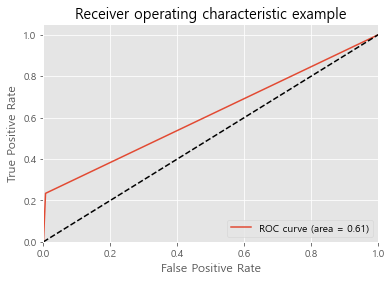

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression - 변수 중요도 확인

In [ ]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1.34756
Feature: 1, Score: 0.58640
Feature: 2, Score: 0.57940
Feature: 3, Score: 0.63365
Feature: 4, Score: 0.63669
Feature: 5, Score: 0.88778
Feature: 6, Score: 0.55053
Feature: 7, Score: -0.67367
Feature: 8, Score: -0.38894
Feature: 9, Score: 0.54854
Feature: 10, Score: 0.67495
Feature: 11, Score: 1.00440
Feature: 12, Score: -0.63518
Feature: 13, Score: -0.63518
Feature: 14, Score: -0.15887
Feature: 15, Score: 0.77534
Feature: 16, Score: -1.24227
Feature: 17, Score: -0.72933
Feature: 18, Score: 0.19242
Feature: 19, Score: 0.12884
Feature: 20, Score: -0.43225
Feature: 21, Score: 0.98224
Feature: 22, Score: 0.12884
Feature: 23, Score: -0.70018
Feature: 24, Score: 0.92320
Feature: 25, Score: -1.03612
Feature: 26, Score: -0.88638
Feature: 27, Score: -0.59909
Feature: 28, Score: 0.06203
Feature: 29, Score: 0.84066
Feature: 30, Score: 0.19266
Feature: 31, Score: 0.12659
Feature: 32, Score: 0.77447
Feature: 33, Score: 0.36003
Feature: 34, Score: 0.00000
Feature: 35, Score

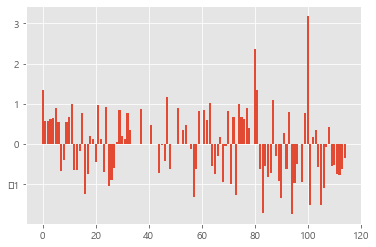

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Decision Tree

In [ ]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [ ]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

훈련 세트 정확도 : 0.86674
테스트 세트 정확도 : 0.84143


In [ ]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [ ]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
get_clf_eval(y_test, pred_probs)

오차행렬:
 [[12973   661]
 [ 2182  2113]]

정확도: 0.8414
정밀도: 0.7617
재현율: 0.4920
F1: 0.5978
AUC: 0.7217


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

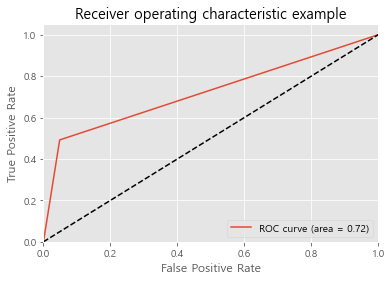

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Decision Tree - 변수 중요도

In [ ]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.93015
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00098
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00221
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00050
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

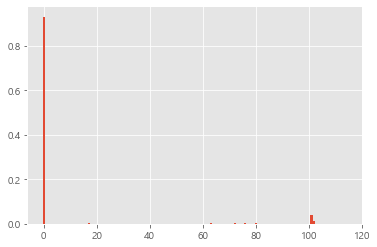

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.870
테스트 세트 정확도 : 0.844


In [ ]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[13345   289]
 [ 2499  1796]]

정확도: 0.8445
정밀도: 0.8614
재현율: 0.4182
F1: 0.5630
AUC: 0.6985


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

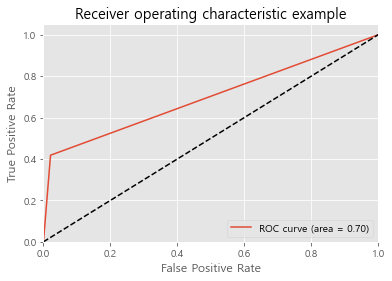

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest - 특성 중요도

In [ ]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.31649
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00038
Feature: 3, Score: 0.01310
Feature: 4, Score: 0.00009
Feature: 5, Score: 0.00042
Feature: 6, Score: 0.00068
Feature: 7, Score: 0.00010
Feature: 8, Score: 0.00086
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.01378
Feature: 11, Score: 0.00046
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00013
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00024
Feature: 18, Score: 0.00004
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00002
Feature: 21, Score: 0.00010
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00069
Feature: 25, Score: 0.00018
Feature: 26, Score: 0.00040
Feature: 27, Score: 0.00038
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00058
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00004
Feature: 32, Score: 0.00012
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

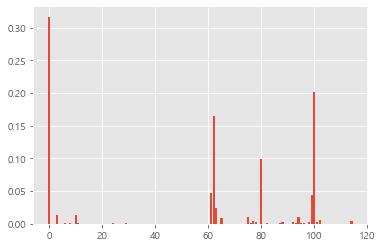

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## XGBOOST

In [ ]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBClassifier(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(15451, 115) (15451, 1)
[11:10:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              subsampling=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [ ]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[11:10:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68994	eval-logloss:0.69019
[1]	train-logloss:0.68677	eval-logloss:0.68727
[2]	train-logloss:0.68362	eval-logloss:0.68436
[3]	train-logloss:0.68051	eval-logloss:0.68150
[4]	train-logloss:0.67743	eval-logloss:0.67866
[5]	train-logloss:0.67438	eval-logloss:0.67585
[6]	train-logloss:0.67136	eval-logloss:0.67306
[7]	train-logloss:0.66837	eval-logloss:0.67030
[8]	train-logloss:0.66540	eval-logloss:0.66757
[9]	train-logloss:0.66248	eval-logloss:0.66488
[10]	train-logloss:0.65957	eval-logloss:0.66219
[11]	train-logloss:0.65669	eval-logloss:0.65956
[12]	train-

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.315 0.315 0.335 0.315 0.335 0.412 0.315 0.315 0.412 0.518]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[12665   969]
 [ 1590  2705]]

정확도: 0.8573
정밀도: 0.7363
재현율: 0.6298
F1: 0.6789
AUC: 0.7794


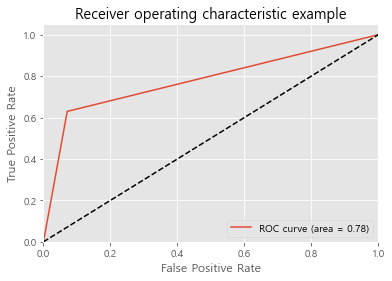

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## XGBOOST - 변수중요도

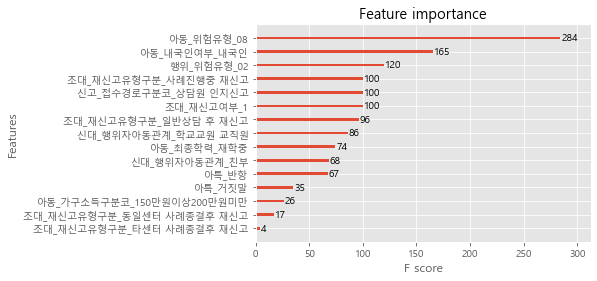

In [ ]:
xgboost.plot_importance(xgb_model)

## SVM

In [ ]:
# 시간걸림
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.870
테스트 세트 정확도 : 0.844


In [ ]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[13207   427]
 [ 2261  2034]]

정확도: 0.8501
정밀도: 0.8265
재현율: 0.4736
F1: 0.6021
AUC: 0.7211


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

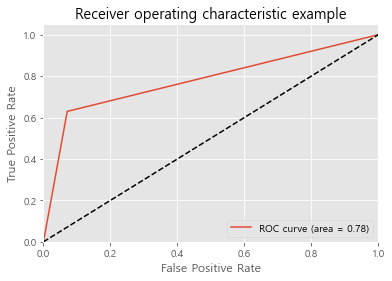

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.505858
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.472383
[3]	valid_0's binary_logloss: 0.446079
[4]	valid_0's binary_logloss: 0.425068
[5]	valid_0's binary_logloss: 0.408675
[6]	valid_0's binary_logloss: 0.39474
[7]	valid_0's binary_logloss: 0.383202
[8]	valid_0's binary_logloss: 0.373382
[9]	valid_0's binary_logloss: 0.365221
[10]	valid_0's binary_logloss: 0.358493
[11]	valid_0's binary_logloss: 0.352564
[12]	valid_0's binary_logloss: 0.347699
[13]	valid_0's binary_logloss: 0.34324
[14]	valid_0's binary_logloss: 0.339426
[15]	valid_0's binary_logloss: 0.335908
[16]	valid_0's binary_logloss: 0.333301
[17]	valid_0's binary_logloss: 0.331077
[18]	valid_0's binary_logloss: 0.328784
[19]	valid_0's binary_logloss: 0.326849
[20]	valid_0's binary_logloss: 0.325248
[21]	valid_0's binary_logloss: 0.323866
[22]	valid_0's binary_logloss: 0.32249
[23]	valid_0's binary_logloss: 0.321288
[24]	valid_0's binary_logloss:

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[12983   651]
 [ 1665  2630]]

정확도: 0.8708
정밀도: 0.8016
재현율: 0.6123
F1: 0.6943
AUC: 0.7823


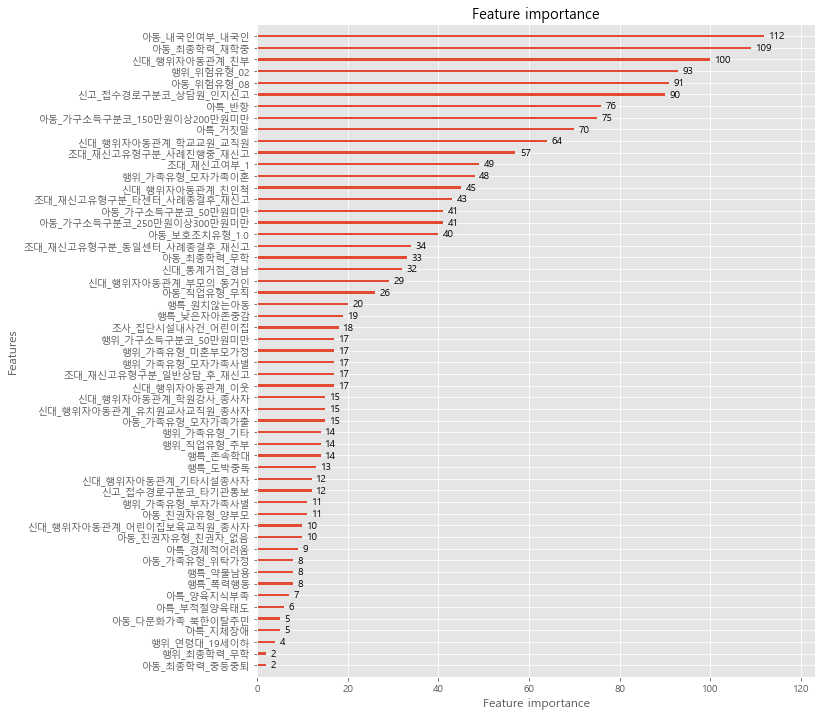

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## Catboost

In [ ]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=4, l2_leaf_reg=20, 
                              bootstrap_type='Bernoulli', subsample=0.6, eval_metric='RMSE', metric_period=50, 
                              od_type='Iter', od_wait=45, random_seed=17, allow_writing_files=False) 

cb_model.fit(X_train, y_train)

preds = cb_model.predict(X_test)

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/options/loss_description.cpp:376: metric [RMSE] is incompatible with loss [Logloss] (no binclass support)

In [ ]:
get_clf_eval(y_test, preds)